# Class 6

Table of Contents

<ol>
  <li>Categories of Data</li>
  <li>Statistics Mini-Review</li>
</ol> 

# 1. Categories of Data

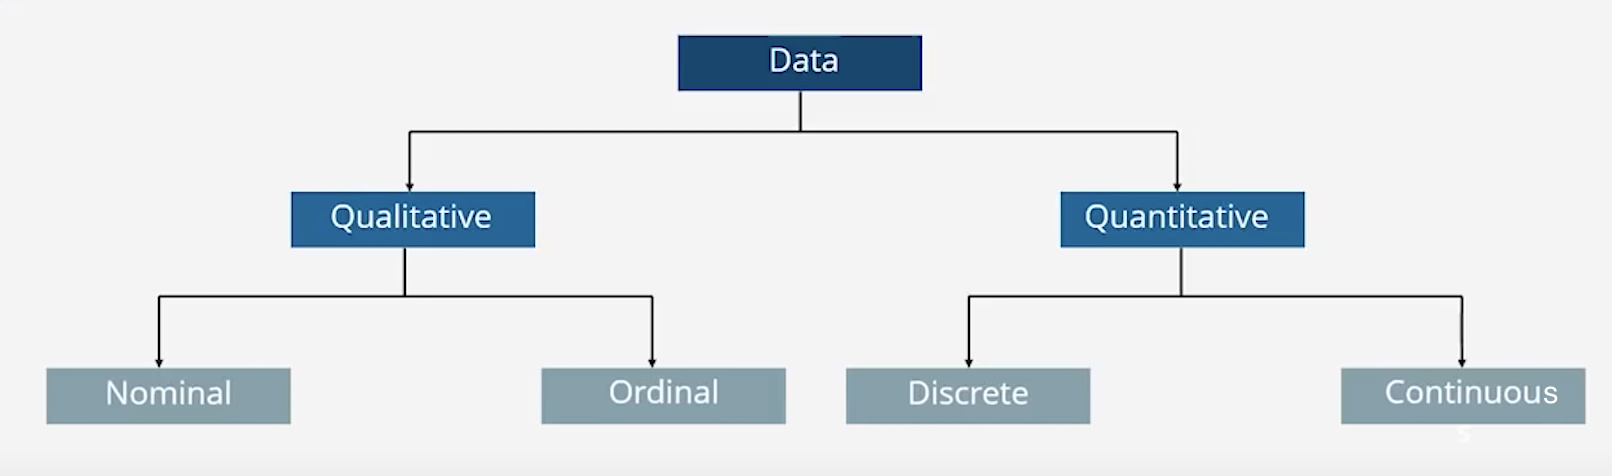

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
Image("images/types_of_data.png")

## Which is which?

- Rating (Good, Average, Bad)? Ordinal
- Gender? M/F - Nominal
- Height of Individuals - Continuous
- Number of Students - Discrete

# 3. Statistics Review

* **Population**: A collection or set of Individuals or Objects or events whose properties are to be analyzed.
* **Sample**: A subset of a population is called a sample.

###  **Measures of Central Tendencies**
* Mean: Measure of average of all values in a sample.
* Median: Measure of the central value of the sample.
* Mode: The value most recurrent in the sample.

When should we use a median and when should we use a mean?

In [2]:
np.random.seed(99)

In [7]:
np.random.randint(low=0, high=10, size=1)

array([9])

In [8]:
np.random.random(10)

array([0.7340626 , 0.70100906, 0.1933131 , 0.97734806, 0.57772631,
       0.51376629, 0.85151867, 0.38105394, 0.27389368, 0.64060144])

In [10]:
values = pd.Series(np.random.random(10)*1000)
values

0    708.607218
1    282.038516
2    923.567811
3    409.755354
4    584.754438
5     43.273430
6    618.620545
7    288.801604
8     80.399917
9    541.143756
dtype: float64

In [12]:
print("Mean: \t", np.round(values.mean(), 2))
print("Median: ", np.round(values.median(), 2))
print("Mode (Counts per value): \n", values.mode())

Mean: 	 448.1
Median:  475.45
Mode (Counts per value): 
 0     43.273430
1     80.399917
2    282.038516
3    288.801604
4    409.755354
5    541.143756
6    584.754438
7    618.620545
8    708.607218
9    923.567811
dtype: float64


### **Measures of Variability (spread)**

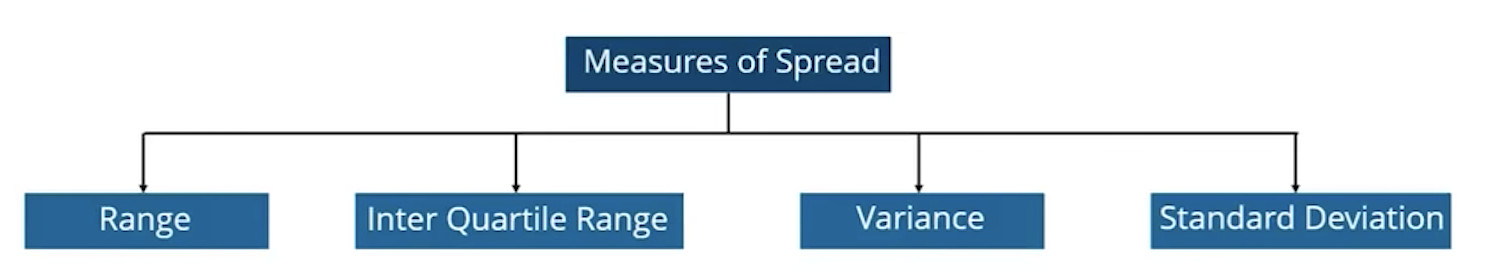

In [13]:
values = pd.Series([1, 2, 3, 4, 5, 6, 7])
Image("images/spread.png")

In [14]:
### Range: Max(x) - Min(x)
print("Range: ", values.max() - values.min())

Range:  6


In [ ]:
# If you want more info, refer to the pandas website.

In [39]:
help(pd.qcut)

Help on function qcut in module pandas.core.reshape.tile:

qcut(x, q, labels=None, retbins: bool = False, precision: int = 3, duplicates: str = 'raise')
    Quantile-based discretization function.
    
    Discretize variable into equal-sized buckets based on rank or based
    on sample quantiles. For example 1000 values for 10 quantiles would
    produce a Categorical object indicating quantile membership for each data point.
    
    Parameters
    ----------
    x : 1d ndarray or Series
    q : int or list-like of float
        Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
        array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
    labels : array or False, default None
        Used as labels for the resulting bins. Must be of the same length as
        the resulting bins. If False, return only integer indicators of the
        bins. If True, raises an error.
    retbins : bool, optional
        Whether to return the (bins, labels) or not. Can b

In [38]:
##  Quartiles tell us about the spread of a data set by breaking the data set into quarters, just like the median breaks it in half.

# Qcut looks at values and creates buckets as the index of the new series.
# The bucket is a range from x to y, with the value included within the range.
# q=N means it will create N buckets.

values.index = pd.qcut(values, q=4)
#values.groupby(values.index).sum()#.plot(kind='bar')
values

(0.999, 2.5]    1
(0.999, 2.5]    2
(2.5, 4.0]      3
(2.5, 4.0]      4
(4.0, 5.5]      5
(5.5, 7.0]      6
(5.5, 7.0]      7
dtype: int64

#### Variance: How much a random variable differs from its expected value

$$S^2 = \frac{\sum_1^{n=1}(x_i - \bar{x})^2}{n}$$

In [54]:
((values - values.mean())**2).sum()/(len(values)-1)

4.666666666666667

In [61]:

variance = sum(((values - values.mean())**2))/(len(values)-1)

print("My variance is (with long formula):", variance)

My variance is (with long formula): 4.666666666666667


My standard deviation - measure of dispersion of a set of data from its mean (in terms of standard deviation)
$$ \sigma = \sqrt{S^2} $$

In [62]:

standard_deviation = np.sqrt(variance) # variance**(0.5)

print("My standard deviation is:", standard_deviation) # Long Formula

print("My standard deviation is:", values.std(ddof=1)) # Short Formula


My standard deviation is: 2.160246899469287
My standard deviation is: 2.160246899469287


## 4. Statistical Testing - Basic Exploratory Data Analysis (EDA)

In [63]:
## Hypothesis Testing is a core data analysis activity behind experimentation.
## The goal of hypothesis testing is to determine if, for instance, the two different
## conditions we have in an experiment have resulted in different impacts.

## We will use Scipy for this.
from scipy import stats

In [64]:
## When we do hypothesis testing, we actually have two statements of interest: 
## the first is our actual explanation, which we call the alternative hypothesis.
## Our actual testing method is to determine whether the null hypothesis is true or not.
## If we find that there is a difference between groups, then we can reject the null hypothesis and we accept our alternative.

df = pd.read_csv("data/adult.csv")

In [66]:
## Let's get some summary statistics...

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 32561 rows and 15 columns


In [69]:
df['income'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [71]:
rich = df[df['income'] == '>50K']

rest = df[df['income'] != '>50K']
#OR 
rest = df[~df.index.isin(rich.index)]

In [72]:
rich.shape, rest.shape

((7841, 15), (24720, 15))

In [17]:
rich

age         workclass  fnlwgt     education  education.num  \
7       74         State-gov   88638     Doctorate             16   
9       41           Private   70037  Some-college             10   
10      45           Private  172274     Doctorate             16   
11      38  Self-emp-not-inc  164526   Prof-school             15   
12      52           Private  129177     Bachelors             13   
...    ...               ...     ...           ...            ...   
32539   34           Private  160216     Bachelors             13   
32541   71                 ?  287372     Doctorate             16   
32547   39         Local-gov  111499    Assoc-acdm             12   
32555   53           Private  321865       Masters             14   
32558   40           Private  154374       HS-grad              9   

           marital.status         occupation    relationship   race     sex  \
7           Never-married     Prof-specialty  Other-relative  White  Female   
9           Never-married       Craft-repair       Unmarried  White    Male   
10               Divorced     Prof-specialty       Unmarried  Black  Female   
11          Never-married     Prof-specialty   Not-in-family  White    Male   
12                Widowed      Other-service   Not-in-family  White  Female   
...                   ...                ...             ...    ...     ...   
32539       Never-married    Exec-managerial   Not-in-family  White  Female   
32541  Married-civ-spouse                  ?         Husband  White    Male   
32547  Married-civ-spouse       Adm-clerical            Wife  White  Female   
32555  Married-civ-spouse    Exec-managerial         Husband  White    Male   
32558  Married-civ-spouse  Machine-op-inspct         Husband  White    Male   

       capital.gain  capital.loss  hours.per.week native.country income  
7                 0          3683              20  United-States   >50K  
9                 0          3004              60              ?   >50K  
10                0          3004              35  United-States   >50K  
11                0          2824              45  United-States   >50K  
12                0          2824              20  United-States   >50K  
...             ...           ...             ...            ...    ...  
32539             0             0              55  United-States   >50K  
32541             0             0              10  United-States   >50K  
32547             0             0              20  United-States   >50K  
32555             0             0              40  United-States   >50K  
32558             0             0              40  United-States   >50K  

[7841 rows x 15 columns]

In [73]:
## Are the rich and the rest different in age?
print('Average Education: ', round(rich['education.num'].mean(), 2), 
                             round(rest['education.num'].mean(), 2))
print('Average Hours per week: ', round(rich['hours.per.week'].mean(), 2), 
                                  round(rest['hours.per.week'].mean(), 2))

print('Average Age: ', round(rich['age'].mean(), 2), 
                       round(rest['age'].mean(), 2))

Average Education:  11.61 9.6
Average Hours per week:  45.47 38.84
Average Age:  44.25 36.78


In [74]:
# They look very different, but is it statistically significant?
# We can use the t-test for this, which allows us to form the alternative hypothesis 
# ("These are different") as well as the null hypothesis ("These are the same")
# and test the probability that the null hypothesis is true.

# We choose a significance level as a threshold for how much of a chance we're willing to accept. This
# signifiance level is typically called alpha.
# For this example, we'll choose 0.05 for our alpha, or 5%.
# Now this is a commonly used number if it's really quite arbitrary.

# The SciPy library contains a number of different statistical tests and forms a basis for hypothesis testing
# in python and we're going to use the ttest_ind() function which does an independent t-test
# (meaning the populations are related to one another).
# The result of the ttest_index() are the t-stat and a p-value.
# It's the p-value which is important in indicating what hypothesis is true.

from scipy.stats import ttest_ind

In [75]:
print(ttest_ind(rich['hours.per.week'], rest['hours.per.week']))
print(ttest_ind(rich['education.num'], rest['education.num']))
print(ttest_ind(rich['age'], rest['age']))
# this one is not discernible enough (Final weights of each categ).
print(ttest_ind(rich['fnlwgt'], rest['fnlwgt']))

Ttest_indResult(statistic=42.583873499437956, pvalue=0.0)
Ttest_indResult(statistic=64.18797223551665, pvalue=0.0)
Ttest_indResult(statistic=43.4362442404511, pvalue=0.0)
Ttest_indResult(statistic=-1.7075109328052853, pvalue=0.08773666108063947)


In [ ]:
# A value of 0.0 means we can reject the null hypothesis - both populations are different.

In [ ]:
## We can use confidence intervals and bayesian analysis to avoid p-hacking (finding significance at random)

In [77]:
## How does p-hacking work?

In [78]:
df1 = pd.DataFrame([np.random.random(100) for x in range(100)])
df2 = pd.DataFrame([np.random.random(100) for x in range(100)])

In [82]:
# Are these two dataframes the same? For a given row in df1, is it the same row inside df2?
def test_columns(alpha=0.1):
    num_diff=0
    for col in df1.columns:
        teststat,pval = ttest_ind(df1[col],df2[col])
        if pval <= alpha:
            print(f"Col {col} is statistically significantly different at alpha={alpha}, pval={pval}")
            num_diff = num_diff+1
    print(f"Total number of different was {num_diff}, which is {float(num_diff)/len(df1.columns)*100}%")

In [83]:
# Note that we'll expect 5% of the rows to be significant...
test_columns(0.05)

Col 65 is statistically significantly different at alpha=0.05, pval=0.02282013231930498
Col 72 is statistically significantly different at alpha=0.05, pval=0.027003953175347293
Col 94 is statistically significantly different at alpha=0.05, pval=0.02001543060706002
Total number of different was 3, which is 3.0%


In [ ]:
# Choosing alpha is more an art than it is a science.

# Bonus

Profiling Tool. You can use the package `pandas-profiling` that is designed for this purpose.

First, you'll have to install it using `conda` or `pip.` Once that's done, you import `pandas_profiling`

In [92]:
import seaborn as sns

<AxesSubplot:>

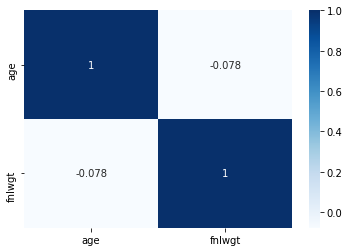

In [95]:
sns.heatmap(df[['age', 'fnlwgt']].corr(method='spearman'), cmap='Blues', annot=True)

In [84]:
import pandas_profiling

In [85]:
pandas_profiling.ProfileReport(df)